In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

# Ejercicio A2

Develop a program that creates a plot of the function $$f(x) =sin( 1/x+ε)$$ for x in the unit interval, where ε > 0 is a given input parameter. Use n + 1 nodes in the plot.


(a) Test the program using n = 10 and ε = 1/5.

In [3]:
def f1(n,epsilon):
    x = np.linspace(0,1,n+1)
    funcion_1 = np.sin(1/(x + epsilon))
    plt.plot(x, funcion_1,c="orange", marker='o', label=f'n={n}, ε={epsilon}')
    plt.xlabel('x')
    plt.ylabel(r'$\sin\left(\frac{1}{x + \epsilon}\right)$')
    plt.title('Gráfico de f(x) = sin(1/(x+ε))')
    plt.legend()
    plt.grid(True)
    return(plt.show()) 

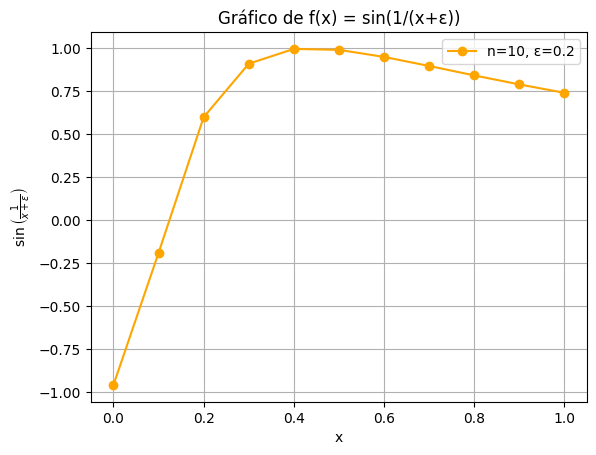

In [4]:
f1(10,1/5)

(b) Refine the program such that it plots the function for two values of
n; say n and n + 10

In [5]:
def f1(n,m,epsilon):
    x_1 = np.linspace(0,1,n+1)
    x_2 = np.linspace(0,1,n+m+1)
    funcion_1 = np.sin(1/(x_1 + epsilon))
    funcion_2 = np.sin(1/(x_2 + epsilon))
    plt.plot(x_1, funcion_1,c="fuchsia", marker='o', label=f'n={n}, ε={epsilon}')
    plt.plot(x_2, funcion_2,c="purple", marker='o', label=f'n={n+m}, ε={epsilon}')
    plt.xlabel('x')
    plt.ylabel(r'$\sin\left(\frac{1}{x + \epsilon}\right)$')
    plt.title('Gráfico de f(x) = sin(1/(x+ε))')
    plt.legend()
    plt.grid(True)
    return(plt.show()) 

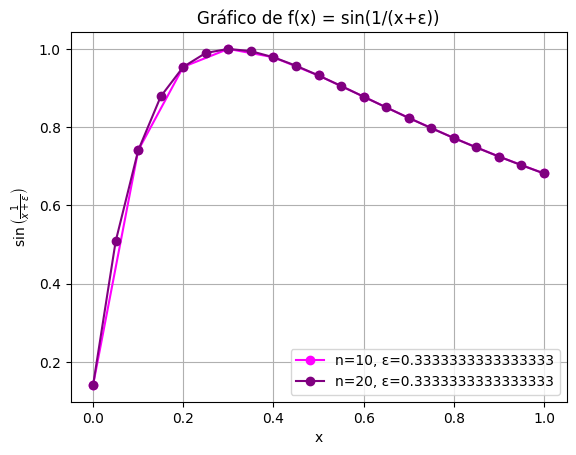

In [6]:
f1(10,10,1/3)

Se puede observar que la linea morada con mayor numero de particiones tiene un comportamiento menos erratico y cortado, 


(C) How large do you have to choose n in order for the difference between
these two functions to be less than 0.1? Hint: Each function gives
an array. Create a while loop and use the max function of the arrays
to retrieve the maximum value and compare these

In [7]:
def f11(epsilon):
    n=0
    diferencia_max = 0.1
    while True:
        x_1 = np.linspace(0,1,n+1)
        x_2 = np.linspace(0,1,n+10+1)
        funcion_1 = np.sin(1/(x_1 + epsilon))
        funcion_2 = np.sin(1/(x_2 + epsilon))
        diferencia = np.abs(np.max(funcion_1) - np.max(funcion_2))
        n=n+1
        if diferencia < diferencia_max:
            break

    return print(f"El valor minimo de n es {n}")

#Este codigo no sirve, ya que el contador marca 3 cuando porbando con otros obtenemos valores distintos

Se modifico diversamente el codigo, usando ciclos while, un ciclo for y se obtenian valores muy distitos, se maantuvo la relacion de n y otra particion con n+10 pero igual se intento con intervalos diversos, como solucion a esto usamos directamente la funcion que entregara tal cual la diferemcia entre el maximo de una funcion y otra, con esto obtuvimos el numero de n necesario para poder tener una diferencia menor a .1



In [8]:
def f1(n,m,epsilon):
    x_1 = np.linspace(0,1,n+1)
    x_2 = np.linspace(0,1,n+m+1)
    funcion_1 = np.sin(1/(x_1 + epsilon))
    funcion_2 = np.sin(1/(x_2 + epsilon))
    return np.abs(np.max(funcion_1)-np.max(funcion_2))

In [9]:
f1(2,10,1/5)
#Se necesita n = 2 para epsilon = 1/5

np.float64(0.00880559634753142)

In [10]:
f1(2,10,1/10)
#Se necesita n = 2 para epsilon = 1/10

np.float64(0.0)

In [11]:
f1(1,10,1/20)
#Se necesita n = 1 para epsilon = 1/20

np.float64(0.08116432290301823)

(f)Try to find a formula for how large n needs to be for a given value
of ε such that increasing n further does not change the plot so much
that it is visible on the screen. Note that there is no exact answer
to this question.

# Conclusion 

Vemos que existe una relacion directamente proporcional, conforme el valor de e es menor el valor de n tambien, sin emvargo se puede establecer una relacion directa o porporcionar una formula 

# EJERCICIO A.3
Consider the function $$f(x) = \sin(\frac{1}{x + \epsilon})$$ 
for x ranging from 0 to 1, and the derivative $$f´(x) = \frac{-\cos(\frac{1}{x + \epsilon})}{(x- \epsilon)^{2}}$$
Here, ε is a given input parameter

(a)Develop a program that creates a plot of the derivative of f = f(x)
based on a finite difference approximation using n computational
nodes. The program should also graph the exact derivative given by f′ = f′(x) above.


In [12]:
#Para esto usaremos la definicion formal de derivada 
def derivadagrafica(n,funcion,fderivdad,epsilon):
    dominio=np.linspace(0,1,n+1)# estabesco el dominio de la funcion 
    h = dominio[2]-dominio[1] #el valor de h que depende del numero n
    defderivada= (funcion(dominio+h,epsilon ) - funcion(dominio,epsilon ))/h #uso la df de derivada
    plt.plot(dominio,defderivada,c="pink")
    plt.plot(dominio,fderivdad(dominio,epsilon),c="blue")
    return plt.show

(b)Test the program using n = 10 and ε = 1/5.

<function matplotlib.pyplot.show(close=None, block=None)>

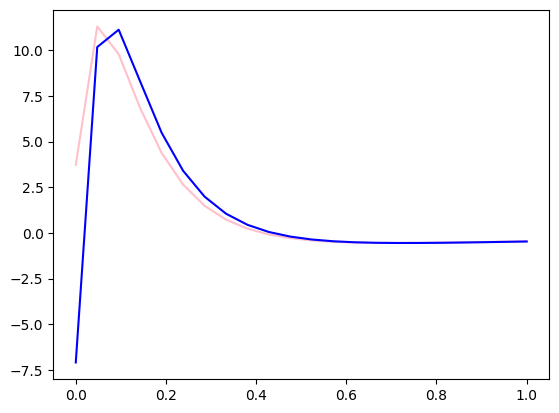

In [13]:
#Se define las funciones de derivada y nuestra funcion original
def ff(x2,eps):
    return np.sin(1 / (x2 + eps))
def df(x1,eps):
    return -(np.cos(1 / (x1 + eps))) / ((x1 + eps)**2)

derivadagrafica(21,ff,df,1/5)

Como primera aproximacion y con un numeor pequeño de particiones vemos que en general ambas funciones presentan un comportamietno parecido, vemos la precensia de un pico y como los valores convergen en este intervalo, pero de form general nuestra aproxiamacion aun esta lejos de ser identa a la derivada real 

(c)How large do you have to choose n in order for the difference between
these two functions to be less than 0.1? Hint: Each function gives
an array. Create a while loop and use the max function of the arrays
to retrieve the maximum value and compare these

In [14]:
def derivadab(funcion,fderivda,epsilon):
    diferencia = 0
    n=1
    while True:
        dominio=np.linspace(0,1,n+1)
        h = dominio[1]-dominio[0]
        defderivada= (funcion(dominio+h,epsilon ) - funcion(dominio,epsilon ))/h
        diferencia = np.abs(np.mean(fderivda(dominio,epsilon)) - np.mean(defderivada)) 
        if diferencia < .1:
            break
        n = n+1
    return print(f" Hay una diferencia de {diferencia} correspondiente al valor n de {n}")

In [15]:
derivadab(ff,df,1/5)

 Hay una diferencia de 0.0990921766511419 correspondiente al valor n de 45


El ejercicio recomomienda tomar el valor maximo de cada funcion y  la primera diferencia menor a .1 se daba con n =  a 7, en efecto la diferencia era menor a ese valor pero era con maximos totalmente distintos, o sea, que eran maximos que correspondian a diferentes valores del dominio, por ello se opto po usar el promedio de cada funcion y a ese si sacar la diferencia, a continucion dejo la comparacion de las dos graficas de 7 y 41 

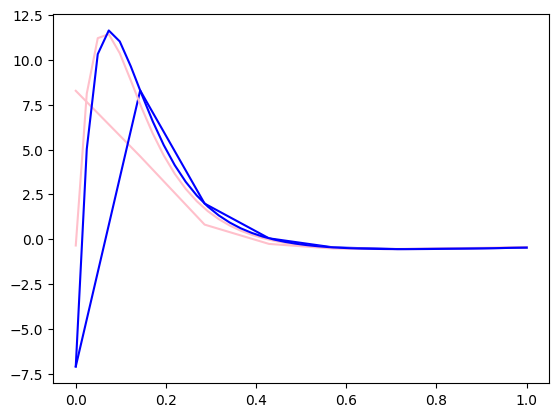

In [16]:
derivadagrafica(7,ff,df,1/5)
plt.show(derivadagrafica(41,ff,df,1/5))

(d)Let ε = 1/10, and repeat (c).

 Hay una diferencia de 0.09988215868566641 correspondiente al valor n de 414


<function matplotlib.pyplot.show(close=None, block=None)>

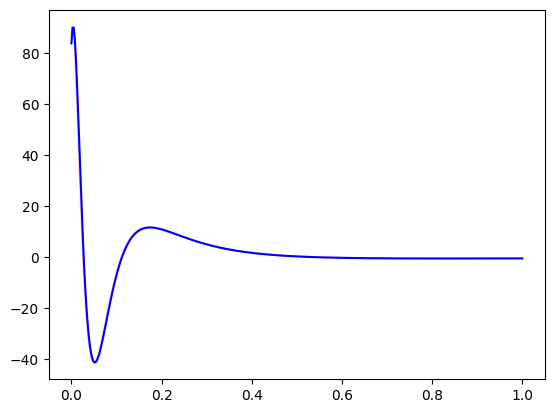

In [17]:
derivadab(ff,df,1/10)
derivadagrafica(390,ff,df,1/10)

In [18]:
derivadab(ff,df,1/20)

 Hay una diferencia de 0.01849223860217486 correspondiente al valor n de 58


<function matplotlib.pyplot.show(close=None, block=None)>

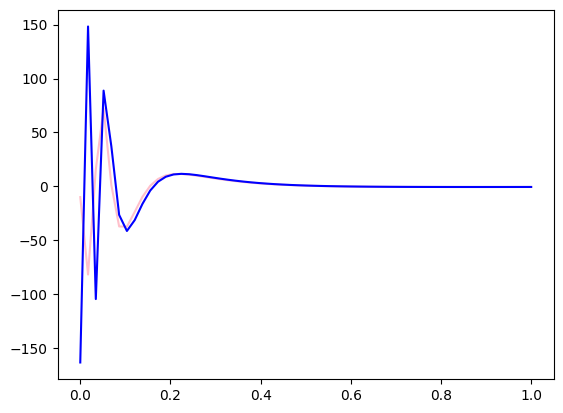

In [19]:
derivadagrafica(58,ff,df,1/20)

In [55]:
def derivadabmen(n,funcion,fderivda,epsilon):
    diferencia = 0
    while diferencia < 0.1:
        dominio=np.linspace(0,1,n+1)
        h = dominio[2]-dominio[1]
        defderivada= (funcion(dominio+h,epsilon ) - funcion(dominio,epsilon ))/h
        diferencia = np.abs(np.mean(fderivda(dominio,epsilon)) - np.mean(defderivada))
        n= n+1 
        

    return diferencia 

In [56]:
derivadabmen(400,ff,df,1/10)

np.float64(0.10330352948151189)

(f)Try determine experimentally how large n needs to be for a given
value of ε such that increasing n further does not change the plot
so much that you can view it on the screen. Note, again, that there
is no exact solution to this problem.

Para este caso no el comportamiewnto no presneta una realcion directa, a pesar de que la frafica con epsilon = 1/20 tiene un comortamiento mas erratico y mas maximos llego a una diferencia menor con menor valor de n co respecto a el epsilon 1/10

# Ejercicio A.4

(a)Let $$ \overline{a} = \int_{0}^{1} e^{4x}\, dx = \frac{1}{4}e^{4} - \frac{1}{4} $$
Compute the integral using the program trapezoidal.py and, for a
given n, let a(n) denote the result. Try to find, experimentally, how
large you have to choose n in order for $$|a - a(n)|< \epsilon$$
ε = 1/100

In [65]:
#En este caso usraremos el  metodo de Gauss-Legendre, usaremos el mismo codigo que la tarea anterior con unas cuantas modificaciones 
def gauss_legendre(a,b,n,fun,valor_teorico):
    xi, wi = np.polynomial.legendre.leggauss(n) #obtenemos los puntos y pesos de gauss legendre par n 
    entrada = (xi/2)*(b-a) + ((b+a)/2)
    fun = np.vectorize(fun) #vectorizamos la funcion 
    resultado_gl = ((b-a)/2) * np.sum(wi * fun(entrada))
    error = abs((resultado_gl - valor_teorico))
    return  float(error)
#definimos la funcion que nos dara el valor teorico
valor_real = (np.exp(4)/4) - 1/4
#defenimos la funcion 
def funcion4(x):
    return np.exp(4*x)

def gauss_legendre2(a,b,fun,valor_teorico,epsilon):
    errorr=0
    n=1
    while True:
        xi, wi = np.polynomial.legendre.leggauss(n) #obtenemos los puntos y pesos de gauss legendre par n 
        entrada = (xi/2)*(b-a) + ((b+a)/2)
        resultado_gl = ((b-a)/2) * np.sum(wi * fun(entrada))
        errorr = np.abs((resultado_gl - valor_teorico))
        if errorr < epsilon:
            break
        n = n+1
    return  print(f"El erro es de {errorr} teniendo un valor n de {n}")



In [67]:
gauss_legendre2(0,1,funcion4,valor_real,.01)

El erro es de 0.00030045820494706277 teniendo un valor n de 4


(b)Repeat (a) with ε = 1/1000.

In [73]:
gauss_legendre2(0,1,funcion4,valor_real,1/1000)

El erro es de 0.00030045820494706277 teniendo un valor n de 4


In [74]:
gauss_legendre2(0,1,funcion4,valor_real,1/10000)

El erro es de 3.318949143960026e-06 teniendo un valor n de 5


In [76]:
gauss_legendre(0,1,5,funcion4,valor_real)

3.318949143960026e-06

(d)Try to figure out, in general, how large n has to be in order for
|a − a(n)| < ε
for a given value of ε.

In [78]:
#La funcion gauss_legendr justo nos da eso, a cualquier valor de e te da cuantos n nececitas 

# Ejercicio A.6

(a)Plot the function e
−x
2
for x ranging from −10 to 10 and use the
plot to argue that $$\int_{-\infty}^{\infty} e^{-x^2} \, dx = 2 \int_{0}^{\infty} e^{-x^2} \, dx$$


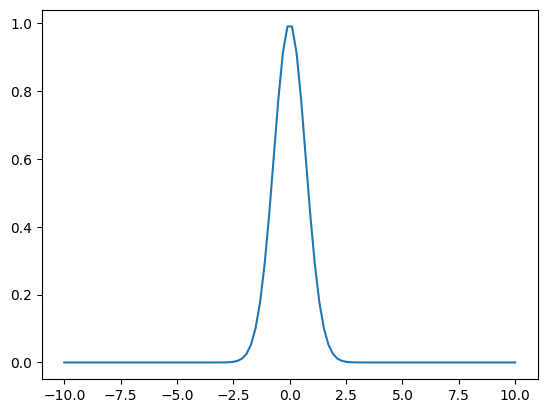

In [81]:
def fun6(x):
    return np.exp(-x**2)
dom = np.linspace(-10,10,100)
plt.plot(dom,fun6(dom))

Recordemos que lo que calcula la integral es el area bajo la curva de una funcion, en este caso de la funcion continua que tiende a infinito y menos infinito la interal  1 que justo tiene esos limites de integracion nos darian toda el area bajo la curva, ahora vemos cierta simetria a la largo del valor 0 sin mencionar que la funcion es una funcion par, esto significa que area bajo la curva de menos infinito a 0 es igual a la de 0 a infinito, por ello ambas integrales son iguales 

(b)Let T(n, L) be the approximation of the integral $$2 \int_{0}^{\infty} e^{-x^2} \, dx$$ computed by the Trapezoidal method using n computational points.
Develop a program that computes the value of T for a given n and L

In [143]:
#Usaremos el metodo de Gauss-Legendre:
def funint6(x):
    return 2*np.exp(-x*2)
def gauss_legendreb(a,b,n,fun,):
    xi, wi = np.polynomial.legendre.leggauss(n) #obtenemos los puntos y pesos de gauss legendre par n 
    entrada = (xi/2)*(b-a) + ((b+a)/2)
    fun = np.vectorize(fun) #vectorizamos la funcion 
    resultado_gl = ((b-a)/2) * np.sum(wi * fun(entrada))
    # error = abs((resultado_gl - valor_teorico))
    return  resultado_gl

In [158]:
gauss_legendreb(0,2,200,funint6)

np.float64(0.9816843611112598)

c)Extend the program developed in (b) to write out values of T(n, L)
in a table with rows corresponding to n = 100, 200, . . . , 500 and
columns corresponding to L = 2, 4, 6, 8, 10.

In [187]:
 def gauss_legendrec(a,fun):
    n = np.arange(100,400,100)
    L = np.arange(2,8,2)
    matriz = np.zeros((5, 5))
    for i in range(len(n)):
      for j in range(len(L)):
        xi, wi = np.polynomial.legendre.leggauss(n[i]) #obtenemos los puntos y pesos de gauss legendre par n 
        entrada = (xi/2)*(L[j]-a) + ((L[j]+a)/2)
        fun = np.vectorize(fun) #vectorizamos la funcion 
        resultado_gl = ((L[j]-a)/2) * np.sum(wi * fun(entrada))
        # error = abs((resultado_gl - valor_teorico))
        matriz[i,j] = resultado_gl
    return  matriz

In [188]:
gauss_legendrec(0,funint6)

array([[0.98168436, 0.99966454, 0.99999386, 0.        , 0.        ],
       [0.98168436, 0.99966454, 0.99999386, 0.        , 0.        ],
       [0.98168436, 0.99966454, 0.99999386, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

En este caso solo se corrio en ese interbalo por que ponerlo completo hacia que mi lap fuera muy lento, vemos que aprece que no cambia pero es que con el metodo de Gausslegendre converje bastante rapido 

(d)Extend the program to also print a table of the errors in T(n, L) for
the same n and L values as in (c). The exact value of the integral
is √
π


In [183]:
 def gauss_legendreerror(a,fun,valor_teorico):
    n = np.arange(100,500,100)
    L = np.arange(2,10,2)
    matriz = np.zeros((5, 5))
    for i in range(len(n)):
      for j in range(len(L)):
        xi, wi = np.polynomial.legendre.leggauss(n[i]) #obtenemos los puntos y pesos de gauss legendre par n 
        entrada = (xi/2)*(L[j]-a) + ((L[j]+a)/2)
        fun = np.vectorize(fun) #vectorizamos la funcion 
        resultado_gl = ((L[j]-a)/2) * np.sum(wi * fun(entrada))
        error = abs((resultado_gl - valor_teorico))
        matriz[i,j] = error
    return  matriz

In [189]:
gauss_legendreerror(0,fun6,np.sqrt(np.pi))

KeyboardInterrupt: 

En caso de los errores pasa lo mismo, vemos que disminuye muy rapido 

  <!-- n = np.arange(100,500,100) -->